# Mnist 
Starter Pack

### Import Some Stuff

In [1]:
import numpy as np 
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import torchvision
from PIL import Image
from sklearn.model_selection import train_test_split
torch.manual_seed(42)
np.random.seed(42)

In [2]:
! ls ../input

sample_submission.csv  test.csv  train.csv


In [3]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
print(train_df.shape)

(42000, 785)


In [4]:
y = train_df['label'].values # extract the numpy array
X = train_df.drop(['label'],1).values # extract the numpy array

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
X_test = test_df.values

In [5]:
BATCH_SIZE = 32

In [6]:
# Custom Tensor Dataset to apply the transform function
class CustomTensorDataset(torch.utils.data.Dataset):
    """TensorDataset with support of transforms like default MNIST datasets from torchvision.
    """
    def __init__(self, data, target=None, transform=None, target_transform=None):
        #super(CustomTensorDataset, self).__init__(data=data, target=target, transform=transform, 
        #                                          target_transform=target_transform)
        self.data = data.reshape((-1, 28, 28)).astype(np.float32)/255
        print(self.data.shape)
        self.target = target
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        # x = Image.fromarray(x, mode='L')
        
        if self.transform:
            x = self.transform(x)
        if self.target is not None:
            y = self.target[index]
        else: 
            y = 0
        return x, y

    def __len__(self):
        return self.data.shape[0]

In [7]:
# The tensors are not normaized. Create the datasets and dataloaders
train = CustomTensorDataset(data=X_train,target=y_train,
                                       transform=torchvision.transforms.Compose([
                                       torchvision.transforms.ToTensor(),
                                       torchvision.transforms.Normalize(
                                         (0.1311,), (0.3086,))
                                     ]))


val = CustomTensorDataset(data=X_val,target=y_val,
                                      transform=torchvision.transforms.Compose([
                                      torchvision.transforms.ToTensor(),
                                      torchvision.transforms.Normalize(
                                         (0.1311,), (0.3086,))
                                     ]))

test = CustomTensorDataset(data=X_test,target=None,
                                      transform=torchvision.transforms.Compose([
                                      torchvision.transforms.ToTensor(),
                                      torchvision.transforms.Normalize(
                                         (0.1311,), (0.3086,))
                                     ]))
# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = True)
val_loader = torch.utils.data.DataLoader(val, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)


(35700, 28, 28)
(6300, 28, 28)
(28000, 28, 28)


In [8]:
# looking at the train loader
dataiter = iter(train_loader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


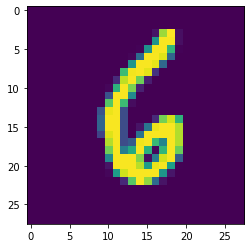

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.squeeze(images[4]))

In [31]:
class CNN(nn.Module):
    # https://stackoverflow.com/a/40295999/8853476
    def __init__(self):
        super(CNN , self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, padding=0, stride=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=0, stride=1)
        self.conv2_drop = nn.Dropout2d(0.1)
        self.fc1 = nn.Linear(in_features=2048, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=10)
        # self.bnm = nn.BatchNorm2d(64)
    
    def forward(self, x):
        # conv --> norm --> activation --> dropout --> pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = self.conv2_drop(F.relu(self.conv2(x))) 
        x = F.max_pool2d(x, 2)  
        x = x.reshape(-1, 2048)
        x = F.dropout(F.relu(self.fc1(x)), training=self.training, p=0.2)
        x = self.fc2(x)
        return x

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2 , self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=0, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=0, stride=1)
        self.conv2_drop = nn.Dropout2d(0.1)
        self.fc1 = nn.Linear(in_features=1024, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)
        # self.bnm = nn.BatchNorm2d(64)
    
    def forward(self, x):
        # conv --> norm --> activation --> dropout --> pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = self.conv2_drop(F.relu(self.conv2(x))) 
        x = F.max_pool2d(x, 2)  
        x = x.reshape(-1, 1024)
        x = F.dropout(F.relu(self.fc1(x)), training=self.training, p=0.2)
        x = self.fc2(x)
        return x

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3 , self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=0, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=0, stride=1)
        self.conv2_drop = nn.Dropout2d(0.1)
        self.fc1 = nn.Linear(in_features=1024, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)
        # self.bnm = nn.BatchNorm2d(64)
    
    def forward(self, x):
        # conv --> norm --> activation --> dropout --> pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = self.conv2_drop(F.relu(self.conv2(x))) 
        x = F.max_pool2d(x, 2)  
        x = x.reshape(-1, 1024)
        x = F.dropout(F.relu(self.fc1(x)), training=self.training, p=0.2)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class CNN4(nn.Module):
    def __init__(self):
        super(CNN4 , self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, padding=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, padding=2, stride=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, padding=2, stride=1)
        self.conv2_drop = nn.Dropout2d(0.1)
        self.fc1 = nn.Linear(in_features=512, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)
        # self.bnm = nn.BatchNorm2d(64)
    
    def forward(self, x):
        # conv --> norm --> activation --> dropout --> pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.relu(self.conv2(x)) 
        x = F.max_pool2d(x, 2)  
        x = self.conv2_drop(F.relu(self.conv3(x))) 
        x = F.max_pool2d(x, 2)  
        x = x.reshape(-1, 512)
        x = F.dropout(F.relu(self.fc1(x)), training=self.training, p=0.2)
        x = self.fc2(x)
        return x

### Model details

In [32]:
net = CNN4() # 1 and 3 are big but you get diminishing return after some point. Actually data augmentation would help
print(net)

CNN4(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (conv2_drop): Dropout2d(p=0.1, inplace=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
net = CNN2() # 1 and 3 are big but you get diminishing return after some point. Actually data augmentation would help
print(net)

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Helper Functions

In [34]:
def train(model, train_loader, criterion, optimizer, test_loader, EPOCHS=5, log_at_batch=False):
    total_loss = []
    total_acc = []
    model.train()
    model.to(device)
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            # Send to cpu or gpu 
            data, target = data.to(device), target.to(device)
            # Zero out the grads 
            optimizer.zero_grad()
            # Get output
            output = model(data)
            # Get training loss
            loss = criterion(output, target)
            # BAckprop
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1] 
            correct += (predicted == target).sum()
            #print(correct)
            if batch_idx % 100 == 0 and log_at_batch:
                print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                    epoch, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.data, float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))
            
        total_loss.append(loss.data)
        total_acc.append(correct/len(train_loader.dataset))
        print("Epoch {}".format(epoch))
        evaluate(model, test_loader)
    
    return {"loss": total_loss, "accuracy": total_acc} 
        
def evaluate(network, test_loader):
    correct = 0 
    network.eval()
    test_preds = torch.LongTensor()
    target_cpu = torch.LongTensor()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = network(data)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
            test_preds = torch.cat((test_preds, pred.cpu()), dim=0)
            target_cpu = torch.cat((target_cpu, target.cpu()), dim=0)
        print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*BATCH_SIZE)))
    return test_preds, target_cpu

## Train

In [35]:
optimizer = torch.optim.Adam(net.parameters())# Default lr=0.001, betas=(0.9,0.999))
criterion = nn.CrossEntropyLoss()

In [36]:
report = train(net, train_loader, criterion, optimizer, val_loader, EPOCHS=20)

Epoch 0
Test accuracy:0.973% 
Epoch 1
Test accuracy:0.976% 
Epoch 2
Test accuracy:0.977% 
Epoch 3
Test accuracy:0.983% 
Epoch 4
Test accuracy:0.977% 
Epoch 5
Test accuracy:0.986% 
Epoch 6
Test accuracy:0.983% 
Epoch 7
Test accuracy:0.984% 
Epoch 8
Test accuracy:0.986% 
Epoch 9
Test accuracy:0.986% 
Epoch 10
Test accuracy:0.986% 
Epoch 11
Test accuracy:0.985% 
Epoch 12
Test accuracy:0.984% 
Epoch 13
Test accuracy:0.986% 
Epoch 14
Test accuracy:0.984% 
Epoch 15
Test accuracy:0.987% 
Epoch 16
Test accuracy:0.983% 
Epoch 17
Test accuracy:0.989% 
Epoch 18
Test accuracy:0.986% 
Epoch 19
Test accuracy:0.984% 


In [37]:
report2 = train(net, train_loader, criterion, optimizer, val_loader, EPOCHS=10)

Epoch 0
Test accuracy:0.986% 
Epoch 1
Test accuracy:0.988% 
Epoch 2
Test accuracy:0.985% 
Epoch 3
Test accuracy:0.988% 
Epoch 4
Test accuracy:0.985% 
Epoch 5
Test accuracy:0.987% 
Epoch 6
Test accuracy:0.984% 
Epoch 7
Test accuracy:0.987% 
Epoch 8
Test accuracy:0.984% 
Epoch 9
Test accuracy:0.986% 


## Create Submission

In [38]:
def get_results(network, test_loader):
    correct = 0 
    network.eval()
    test_preds = torch.LongTensor()
    target_cpu = torch.LongTensor()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data = data.to(device)
            output = network(data)
            pred = output.data.max(1, keepdim=True)[1]
            test_preds = torch.cat((test_preds, pred.cpu()), dim=0)
    return test_preds

In [43]:
#test_preds, _ = evaluate(net, test_loader)
test_preds = get_results(net, test_loader)

In [44]:
submission_df = pd.read_csv("../input/sample_submission.csv")
submission_df['Label'] = test_preds.numpy().squeeze()
submission_df.to_csv(path_or_buf='submission.csv',index=False)

In [ ]:
!ls